# K-nearest neighbors:

In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
import numpy as np

import warnings
warnings.filterwarnings('ignore')

match_data = pd.read_csv('match_data.csv')
match_data = match_data.drop(columns=['ID', 'Top', 'Jungle', 'Mid', 'Bot', 'Support', 'Enemy Top', 'Enemy Jungle', 'Enemy Mid', 'Enemy Bot', 'Enemy Support'])

### Splitting the dataset:

In [2]:
train, test = train_test_split(match_data, test_size=0.2)
x_train, y_train = train.drop(columns=['Victory']), train['Victory']
x_test, y_test = test.drop(columns=['Victory']), test['Victory']

### Hyperparameter tuning:

In [6]:
parameters = {
    'n_neighbors' : [1, 2, 5, 10, 100, 500], 
    'leaf_size'   : [1, 3, 5],
}

knn = KNeighborsClassifier()

grid_logistic = GridSearchCV(knn, param_grid=parameters, scoring='accuracy', cv=10)

grid_logistic.fit(x_train, y_train)

print("Tuned Hyperparameters :", grid_logistic.best_params_)
print("Accuracy :",grid_logistic.best_score_)

Tuned Hyperparameters : {'leaf_size': 3, 'n_neighbors': 1}
Accuracy : 0.7407627762999665


### Training the model:

In [7]:
knn = KNeighborsClassifier(n_neighbors=1, leaf_size=3)
knn.fit(x_train, y_train)

y_train_pred = knn.predict(x_train)
# Make predictions on the testing set
predictions = knn.predict(x_test)

print("Testing results:\n\n %s" % classification_report(y_test, predictions))

training_mse = mean_squared_error(y_train.astype(int), y_train_pred.astype(int))
testing_mse = mean_squared_error(y_test.astype(int), predictions.astype(int))

print("Training MSE: %s" % training_mse)
print("Testing MSE: %s" % testing_mse)

print("Variance: %s" % abs(testing_mse - training_mse))

cm = confusion_matrix(y_test, predictions)
print(cm)

Testing results:

               precision    recall  f1-score   support

       False       0.72      0.71      0.72      1627
        True       0.73      0.74      0.73      1703

    accuracy                           0.73      3330
   macro avg       0.73      0.73      0.73      3330
weighted avg       0.73      0.73      0.73      3330

Training MSE: 0.0009011715229798738
Testing MSE: 0.2735735735735736
Variance: 0.27267240205059373
[[1157  470]
 [ 441 1262]]


### Confusion Matrix:

<Figure size 640x480 with 0 Axes>

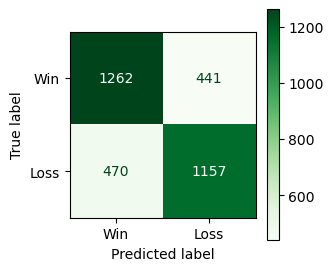

In [9]:
plt.cla()
plt.clf()
disp = ConfusionMatrixDisplay.from_predictions(
                  y_test, 
                  predictions, 
                  labels=[1,0],
                  cmap=plt.cm.Greens,
                  display_labels=['Win','Loss'], 
                  values_format='',  
) 
fig = disp.ax_.get_figure() 
fig.set_figwidth(3)
fig.set_figheight(3) 

plt.show()

In [5]:
# Save Model
import pickle
with open('kNN_model.pkl', 'wb') as file:
    pickle.dump(knn, file)